# Using machine learning methods to diagnose Hepatitis C infection
## Candidate Number: 700057406


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Loading the data set into pandas dataframe df1
df1 = pd.read_csv('hcvdat0.csv')
df1 = df1.drop(columns ='Unnamed: 0')
df1

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Exploratory data analysis

In [9]:
# convert the sex category to numerical
df1['Sex'][df1['Sex']=='m']=0 # 0 for male
df1['Sex'][df1['Sex']=='f']=1 # 1 for female

In [10]:
# convert the Category to numerical 
target_labels = {'0=Blood Donor': 0, '0s=suspect Blood Donor':4, '1=Hepatitis':1, '2=Fibrosis':2, '3=Cirrhosis':3}
df1.loc[:,'Category'] = df1['Category'].apply(lambda a : target_labels[a])

In [11]:
# The df now looks like this
df1

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


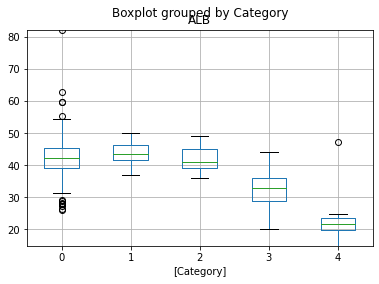

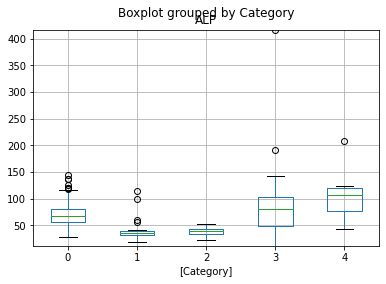

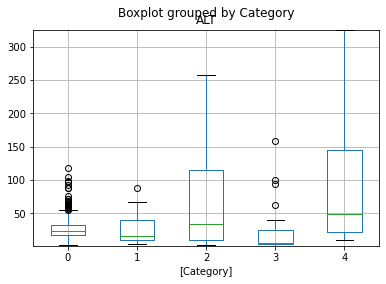

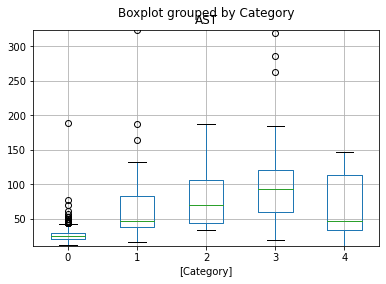

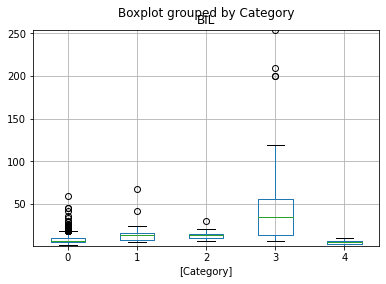

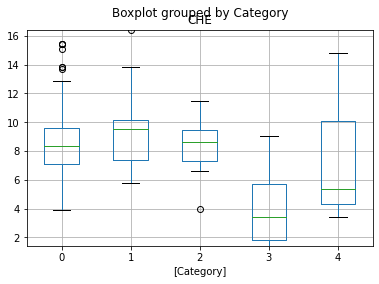

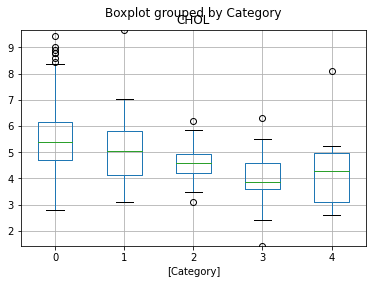

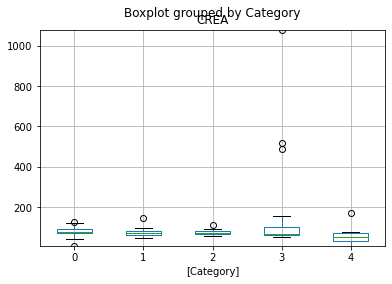

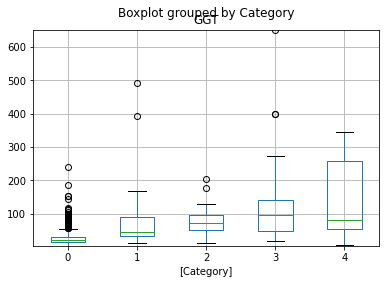

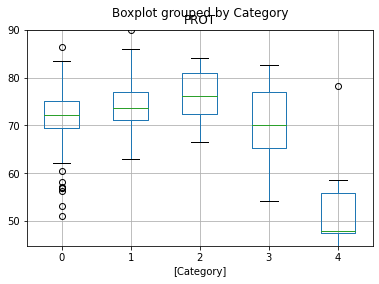

In [7]:
# Exploaroty data analysis with box plots
for col in ('ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT'):
    axes = df1.boxplot(column=[col] ,by=['Category'], return_type='axes')[0]
    axes.set_ylim(np.min(df1[col]), np.max(df1[col]))
plt.show()

## Class imbalance in the data

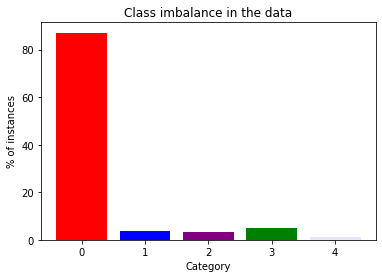

In [624]:
# checking the class imbalance
target_counts = []
for target in (0,1,2,3,4):
    target_counts.append(len(df1['Category'][df1['Category']==target])*100/len(df1))
plt.bar((0,1,2,3,4), target_counts, color=['red', 'blue', 'purple', 'green', 'lavender'])
plt.xlabel('Category')
plt.ylabel('% of instances')
plt.title("Class imbalance in the data")
plt.show()

## Missing values

In [12]:
# which columns have null values
df1.isna().any(axis=0)
# Attributes: ALB, ALP, ALT, CHOL, PROT have null values. All of these are numerical and can be handled by replacing 
# with mean values.

Category    False
Age         False
Sex         False
ALB          True
ALP          True
ALT          True
AST         False
BIL         False
CHE         False
CHOL         True
CREA        False
GGT         False
PROT         True
dtype: bool

In [13]:
# Displaying the records with missing values
def select_rows_with_missing(df):
    return df[df.isna().any(axis=1)==True]
print(select_rows_with_missing(df1))
print(len(select_rows_with_missing(df1)))

     Category  Age Sex   ALB    ALP    ALT    AST    BIL    CHE  CHOL   CREA  \
121         0   43   0  48.6   45.0   10.5   40.5    5.3   7.09   NaN   63.0   
319         0   32   1  47.4   52.5   19.1   17.1    4.6  10.19   NaN   63.0   
329         0   33   1  42.4  137.2   14.2   13.1    3.4   8.23   NaN   48.0   
413         0   46   1  42.9   55.1   15.2   29.8    3.6   8.37   NaN   61.0   
424         0   48   1  45.6  107.2   24.4   39.0   13.8   9.77   NaN   88.0   
433         0   48   1  46.8   93.3   10.0   23.2    4.3  12.41   NaN   52.0   
498         0   57   1  48.4   94.4    2.5   39.6    2.3   8.84   NaN   82.0   
540         1   38   0  45.0   56.3    NaN   33.1    7.0   9.58   6.0   77.9   
541         1   19   0  41.0    NaN   87.0   67.0   12.0   7.55   3.9   62.0   
545         1   29   0  49.0    NaN   53.0   39.0   15.0   8.79   3.6   79.0   
546         1   30   0  45.0    NaN   66.0   45.0   14.0  12.16   6.1   86.0   
568         2   49   0  39.0    NaN  118

In [507]:
(26/615)*100 # % of missing values

4.227642276422764

In [14]:
# Replacing the missing values with the conditional mean grouping by Age and Sex
def replace_missing_with_conditional_mean(df, condition_cols, cols):
    for col in cols:
        df[col]=df.groupby(condition_cols)[col].apply(lambda column: column.fillna(column.mean()))
    return df


In [15]:
df1 = replace_missing_with_conditional_mean(df1, condition_cols=[ 'Sex', 'Age'], 
                                            cols=['ALB', 'ALP', 'ALT', 'CHOL', 'PROT'])

In [16]:
# check how many records still has missing data
select_rows_with_missing(df1)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1,19,0,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
546,1,30,0,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
584,2,75,1,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0


In [17]:
# Dropping the above 3 records having null values
df1.dropna(axis=0,inplace=True)
df1.reset_index(drop=True, inplace=True)

## Correlation 

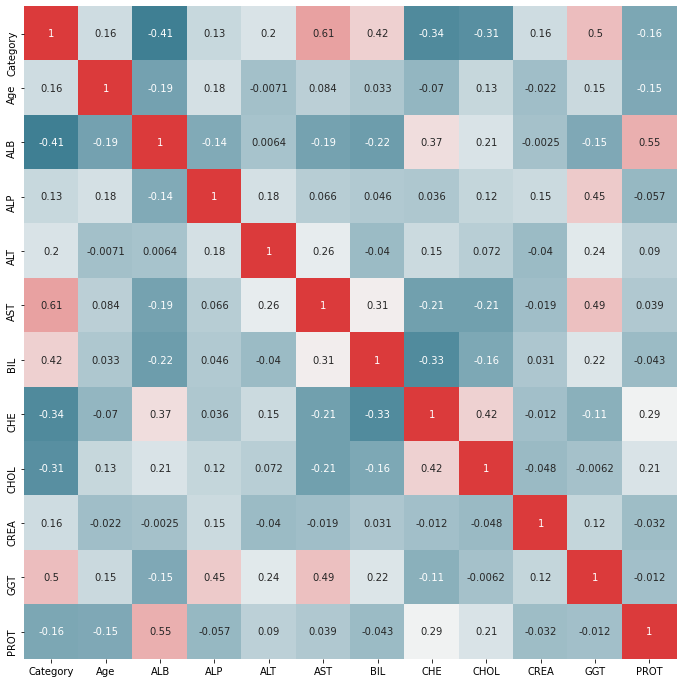

In [512]:
# Plotting the pair-wise correlation among all the attributes
def plot_corr(corr, labels):
    f, ax = plt.subplots(figsize=corr.shape) # cmap = BuPu
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, len(labels), as_cmap=True, center='light'),
                square=True, ax=ax, xticklabels=labels, yticklabels=labels, annot=True, fmt='.2g', cbar=False)
    
# Corelation matrix displaying the pair-wise correlation among all the attributes
corr = df1.corr()
plot_corr(corr, labels=['Category', 'Age', 'ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT'])

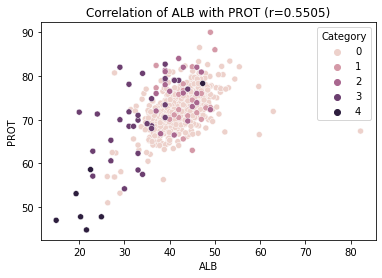

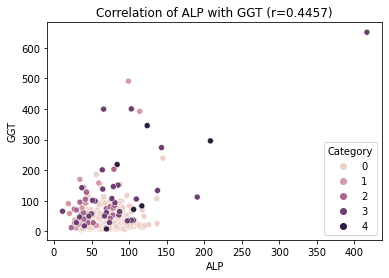

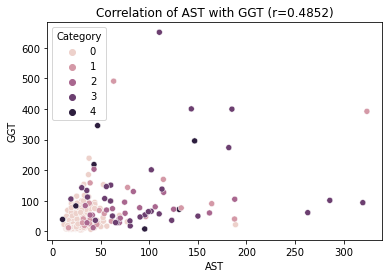

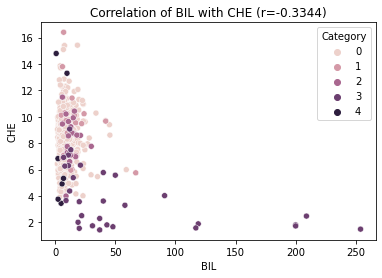

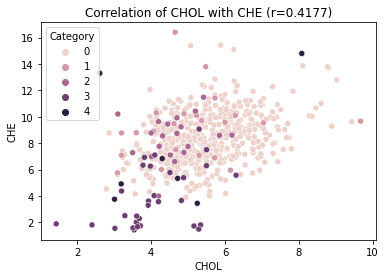

In [513]:
# Plotting the correlated attributes indicating correlation coefficients
for x,y in ([('ALB', 'PROT'),('ALP','GGT'),('AST', 'GGT'),('BIL', 'CHE'),('CHOL', 'CHE')]):
    ax = plt.axes()
    sns.scatterplot(x=x, y=y,
                  hue="Category",
                  data=df1, ax=ax)
    ax.set_title('Correlation of {} with {} (r={})'.format(x,y,round(pearsonr(df1[x], df1[y])[0],4)))
    plt.show()

On studying the correlation coefficients, it is observed that following attributes are quite correlated.
1) 'ALB'and 'PROT'
2) 'ALP' and 'GGT'
3) 'AST' and 'GGT'
4) 'BIL' and 'CHE'
5) 'CHOL'and 'CHE'

## Standardizing the data

In [18]:
X = df1.iloc[:,1:13] # 1:13
y = df1.iloc[:,0]
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)
X

array([[-1.55647438, -0.79498428, -0.54054255, ...,  0.49474281,
        -0.49876544, -0.56104406],
       [-1.55647438, -0.79498428, -0.54054255, ..., -0.14755372,
        -0.43449456,  0.82732742],
       [-1.55647438, -0.79498428,  0.91292981, ...,  0.09330748,
        -0.11130384,  1.34565277],
       ...,
       [ 1.66981629,  1.25788651, -2.18435057, ..., -0.29407762,
         0.45795253,  1.8454665 ],
       [-0.14497221,  1.25788651, -1.49222088, ..., -0.58913259,
         0.19719639, -0.19081167],
       [ 1.16570837,  1.25788651, -0.97312361, ..., -0.28805609,
        -0.09661336, -0.74616026]])

In [19]:
# Fixed random seed will be used for experiements
seed = 42

## Decision tree classifier

In [564]:
# Training and evaluatig a Decision Tree classifier on this training data set.
def train_decision_tree(X_train, y_train,X_test, y_test, seed, criterion='entropy'):
    decision_tree_classifier = DecisionTreeClassifier(random_state = seed, criterion=criterion)
    decision_tree_classifier.fit(X_train, y_train)
    y_pred = decision_tree_classifier.predict(X_test)
    fmeasure = precision_recall_fscore_support(y_test, y_pred, average='micro')[2] # fscore
    return y_pred, fmeasure, decision_tree_classifier

## Base decision tree model (without handling class imbalance)

0.9021739130434784
F score (0.9021739130434783, 0.9021739130434783, 0.9021739130434784, None)
 Accuracy  0.9021739130434783


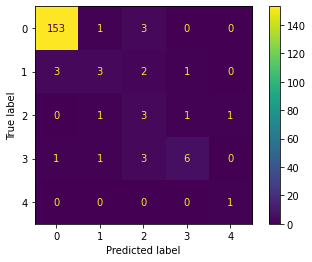

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_pred, fmeasure, dt = train_decision_tree(X_train, y_train,X_test, y_test, seed, criterion='entropy')
print('F score', precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(' Accuracy ', accuracy_score(y_test, y_pred))
# Plotting the best classifier confusion matrix
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

# Accuracy as an evaluation measure does not suit in case of class imbalance. Prescion, Recall and F score are better metrics. 
# However, here F score is also not giving any better picture of the model.

## Decison tree with stratified K fold cross validation

0.9101269169751454


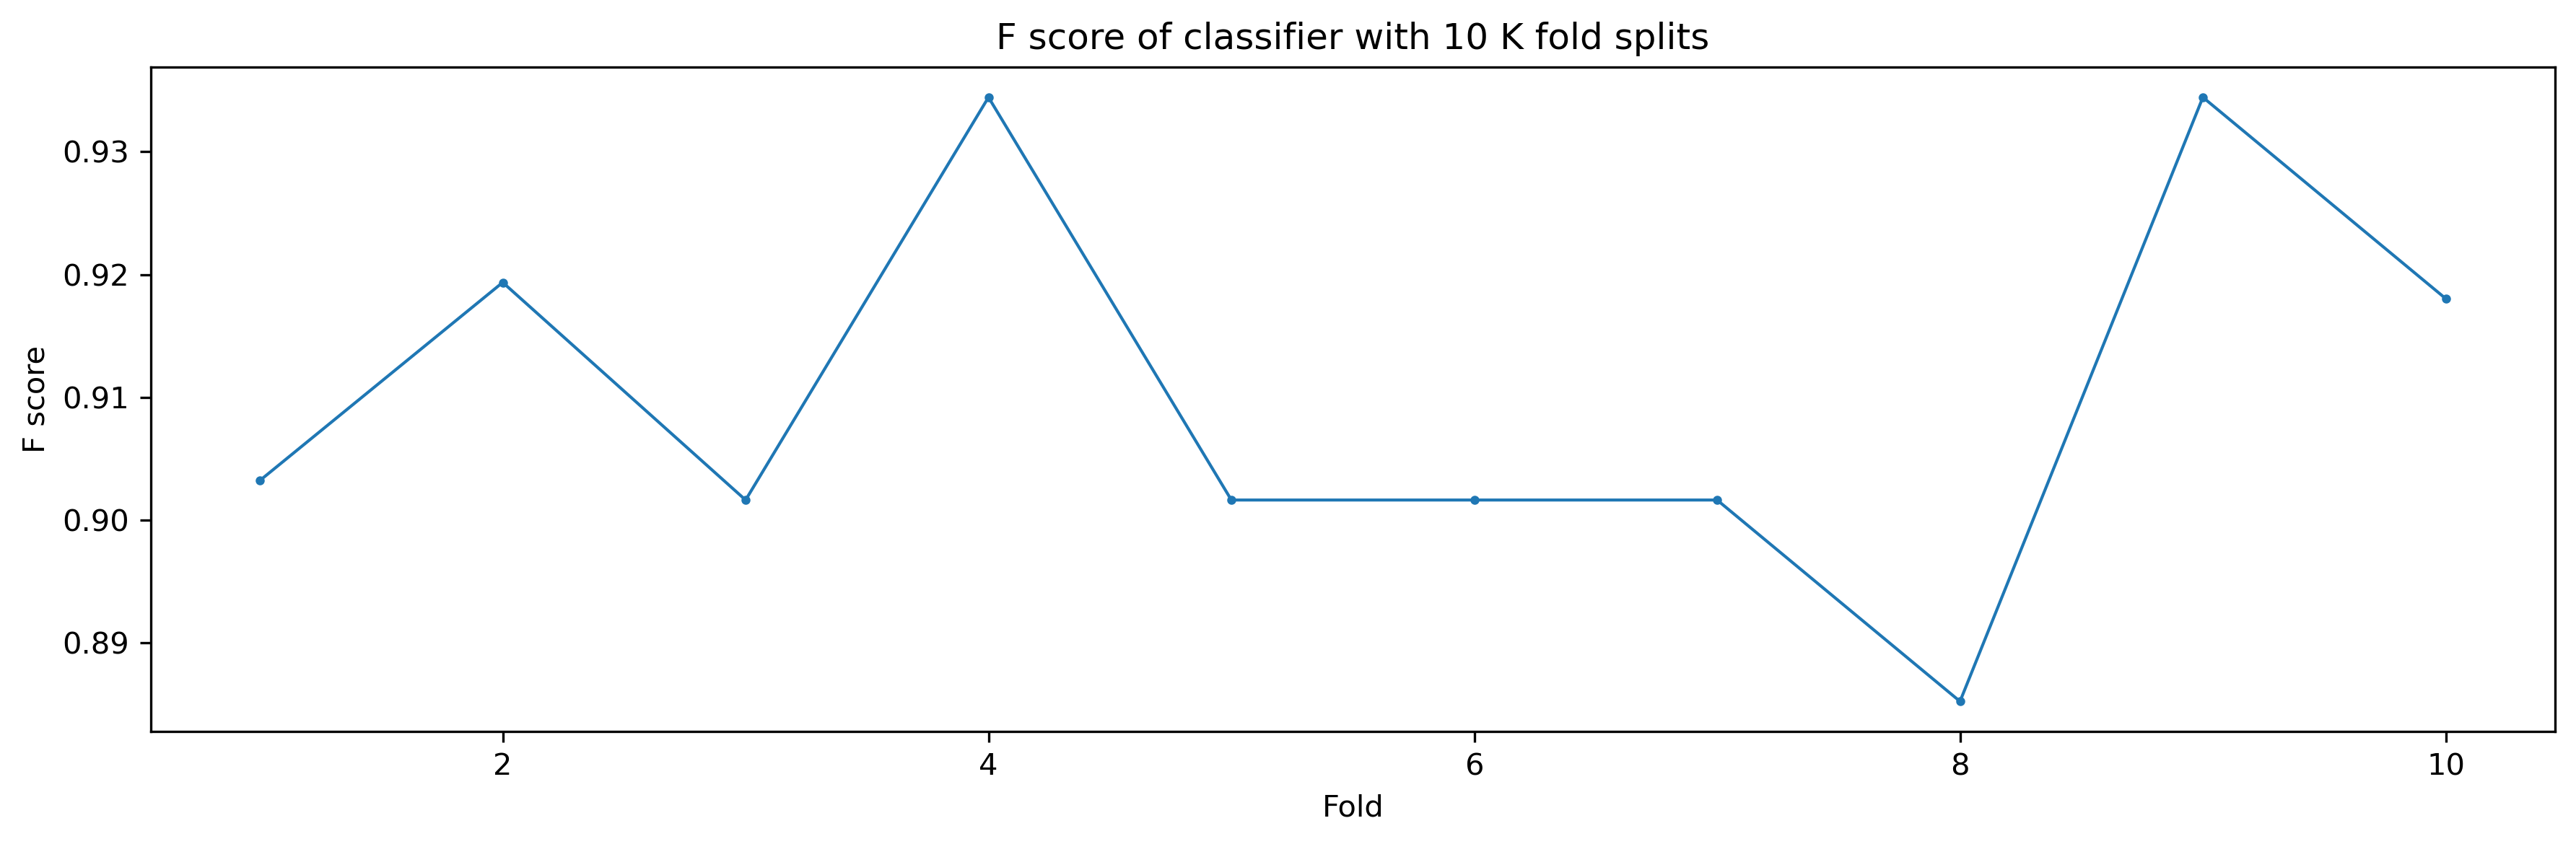

In [604]:
# Stratified K fold is a better alternative in case of class imbalance
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
fmeasures_skfold = []
for train_index, test_index in kfold.split(X,y):  
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    y_pred, fmeasure, dt = train_decision_tree(X_train, y_train,X_test, y_test, seed, criterion='entropy')
    fmeasures_skfold.append(fmeasure)
print(np.mean(fmeasures_skfold))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(1,11), fmeasures_skfold,marker='o', markersize=2, lw=1)
axes.set_xlabel('Fold')
axes.set_ylabel('F score')
axes.set_title('F score of classifier with 10 K fold splits')
fig.tight_layout()
plt.show()


In [606]:
# hence we take average over a number of repeats with different random seeds
no_of_repeats = 10
fmeasures_skfold = []
fmeasures_normal_split = []
for iteration in range(no_of_repeats):
    random_seed = iteration * 20
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_pred, fmeasure, dt = train_decision_tree(X_train, y_train,X_test, y_test, seed,criterion='entropy')
        fmeasures_skfold.append(fmeasure)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_seed, shuffle=True)
    y_pred, fmeasure, dt = train_decision_tree(X_train, y_train,X_test, y_test, seed,criterion='entropy')
    fmeasures_normal_split.append(fmeasure)
fmeasures_skfold = np.mean(fmeasures_skfold)
fmeasures_kfold = np.mean(fmeasures_normal_split)
print('Mean of F scores with Stratified K fold: ', fmeasures_skfold)
print('Mean of F scores with normal split: ', fmeasures_kfold)
# it turns out that K fold split is a better way of training and evaluating the model

Mean of F scores with Stratified K fold:  0.9145346377578002
Mean of F scores with normal split:  0.8864130434782609


## Undersampling using clustering

In [579]:
no_of_repeats = 20
fmeasures = []
for iteration in range(no_of_repeats):
    random_seed = iteration*20
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)
    
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        cc = ClusterCentroids(random_state=seed)
        X_res, y_res = cc.fit_resample(X_train, y_train)
        y_pred, fmeasure, dt = train_decision_tree(X_res, y_res,X_test, y_test, seed, criterion='entropy')
        fmeasures.append(fmeasure)
        
fmeasures = np.mean(fmeasures)
print('Mean of F scores with Stratified K fold using clustering undersampling: ', fmeasures)

Mean of F scores with Stratified K fold using clustering undersampling:  0.7304508196721312


## Oversampling with SMOTE

In [580]:
no_of_repeats = 20
fmeasures = []
for iteration in range(no_of_repeats):
    random_seed = iteration*20

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        smot = SMOTE()
        X_res, y_res = smot.fit_resample(X_train, y_train)
        y_pred, fmeasure, dt = train_decision_tree(X_res, y_res,X_test, y_test,seed, criterion='entropy')
        fmeasures.append(fmeasure)
        
fmeasures = np.mean(fmeasures)
print('Mean of F scores with Stratified K fold using SMOTE oversampling: ', fmeasures)


Mean of F scores with Stratified K fold using SMOTE oversampling:  0.8947792173453198


## Random forest

In [20]:
# Instantiate model with 1000 decision trees
def train_random_forest(X_train, y_train,X_test, y_test, seed, n_estimators=100, min_samples_split=2,criterion='entropy'):
    rf = RandomForestClassifier(n_estimators = n_estimators, random_state = seed, max_features="auto", criterion=criterion,
                               min_samples_split=min_samples_split)
    # Train the model on training data
    rf.fit(X_train, y_train)
    # Use the forest's predict method on the test data
    y_pred = rf.predict(X_test)
    fmeasure = precision_recall_fscore_support(y_test, y_pred, average='micro')[2] # fscore
    return y_pred, fmeasure, rf

In [607]:
# hence we take average over a number of repeats with different random seeds
no_of_repeats = 10
fmeasures_skfold = []
fmeasures_normal_split = []
for iteration in range(no_of_repeats):
    random_seed = iteration * 20
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_pred, fmeasure, dt = train_random_forest(X_train, y_train,X_test, y_test, seed,criterion='entropy')
        fmeasures_skfold.append(fmeasure)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_seed, shuffle=True)
    y_pred, fmeasure, dt = train_random_forest(X_train, y_train,X_test, y_test, seed,criterion='entropy')
    fmeasures_normal_split.append(fmeasure)
fmeasures_skfold = np.mean(fmeasures_skfold)
fmeasures_kfold = np.mean(fmeasures_normal_split)
print('Mean of F scores with Stratified K fold: ', fmeasures_skfold)
print('Mean of F scores with normal split: ', fmeasures_kfold)
# it turns out that Random forest is perorming better

Mean of F scores with Stratified K fold:  0.9249841353781068
Mean of F scores with normal split:  0.9190217391304346


## Using Random forest after oversampling with SMOTE 

In [589]:
no_of_repeats = 10
fmeasures = []
for iteration in range(no_of_repeats):
    random_seed = iteration*20
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        smot = SMOTE()
        X_res, y_res = smot.fit_resample(X_train, y_train)
        y_pred, fmeasure, rf = train_random_forest(X_res, y_res,X_test, y_test, seed, criterion='entropy')
        fmeasures.append(fmeasure)
        
fmeasures = np.mean(fmeasures)
print('Mean of F scores with random forest using SMOTE oversampling: ', fmeasures)

Mean of F scores with random forest using SMOTE oversampling:  0.9348254891591751


In [ ]:
# add some experiments for  random forest

In [22]:
# Experiment for n-estimators
fmeasures = []
for n in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    fmeasure_fold = []   
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        smot = SMOTE()
        X_res, y_res = smot.fit_resample(X_train, y_train)
        y_pred, fmeasure, rf = train_random_forest(X_res, y_res,X_test, y_test, seed, n_estimators=n,criterion='entropy')
        fmeasure_fold.append(fmeasure)
    fmeasures.append(np.mean(fmeasure_fold))
print('Highest F score of random forest when tuning the n-estimators', np.max(fmeasures))


Highest F score of random forest when tuning the n-estimators 0.946060285563194


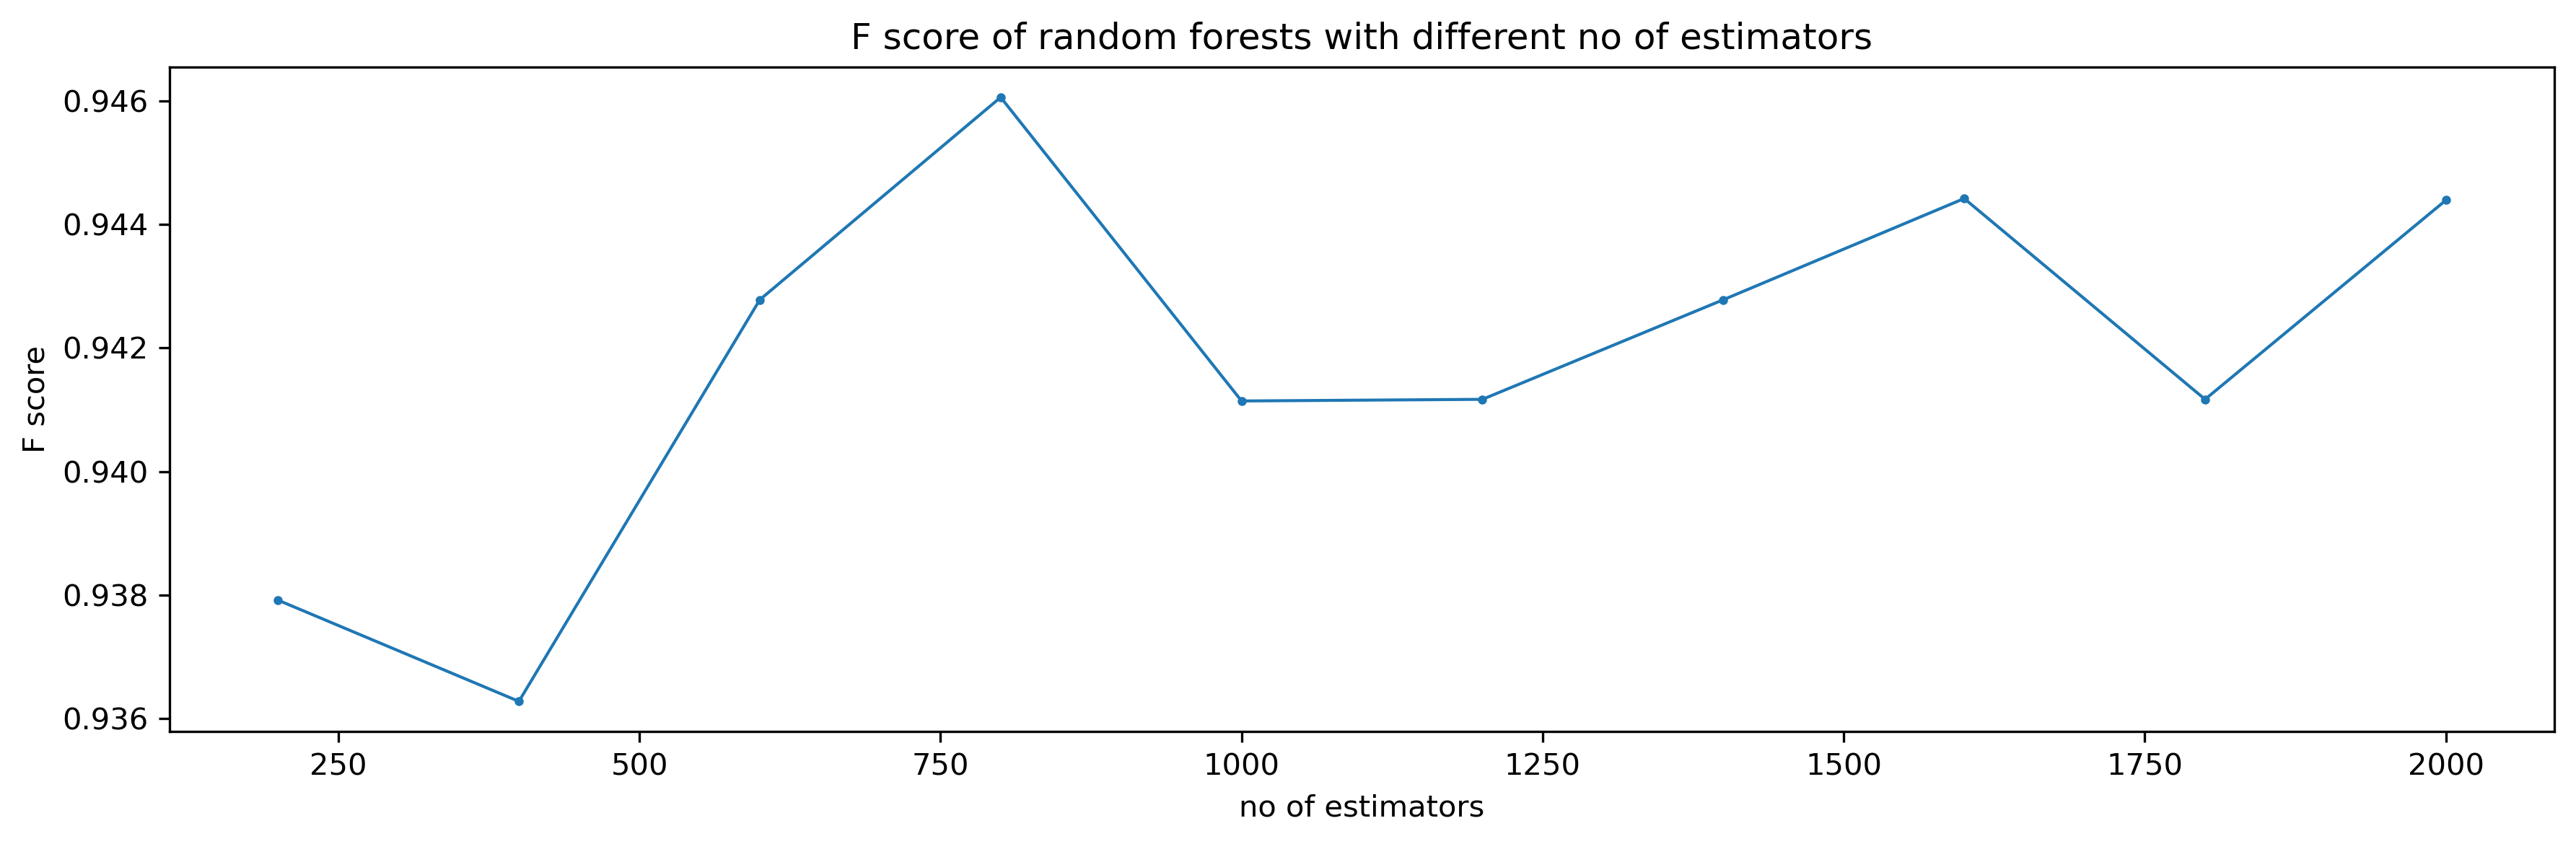

In [23]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], fmeasures,marker='o', markersize=2, lw=1)
axes.set_xlabel('no of estimators')
axes.set_ylabel('F score')
axes.set_title('F score of random forests with different no of estimators')
fig.tight_layout()
plt.show()  

Highest F score of random forest when tuning the min samples split 0.946060285563194


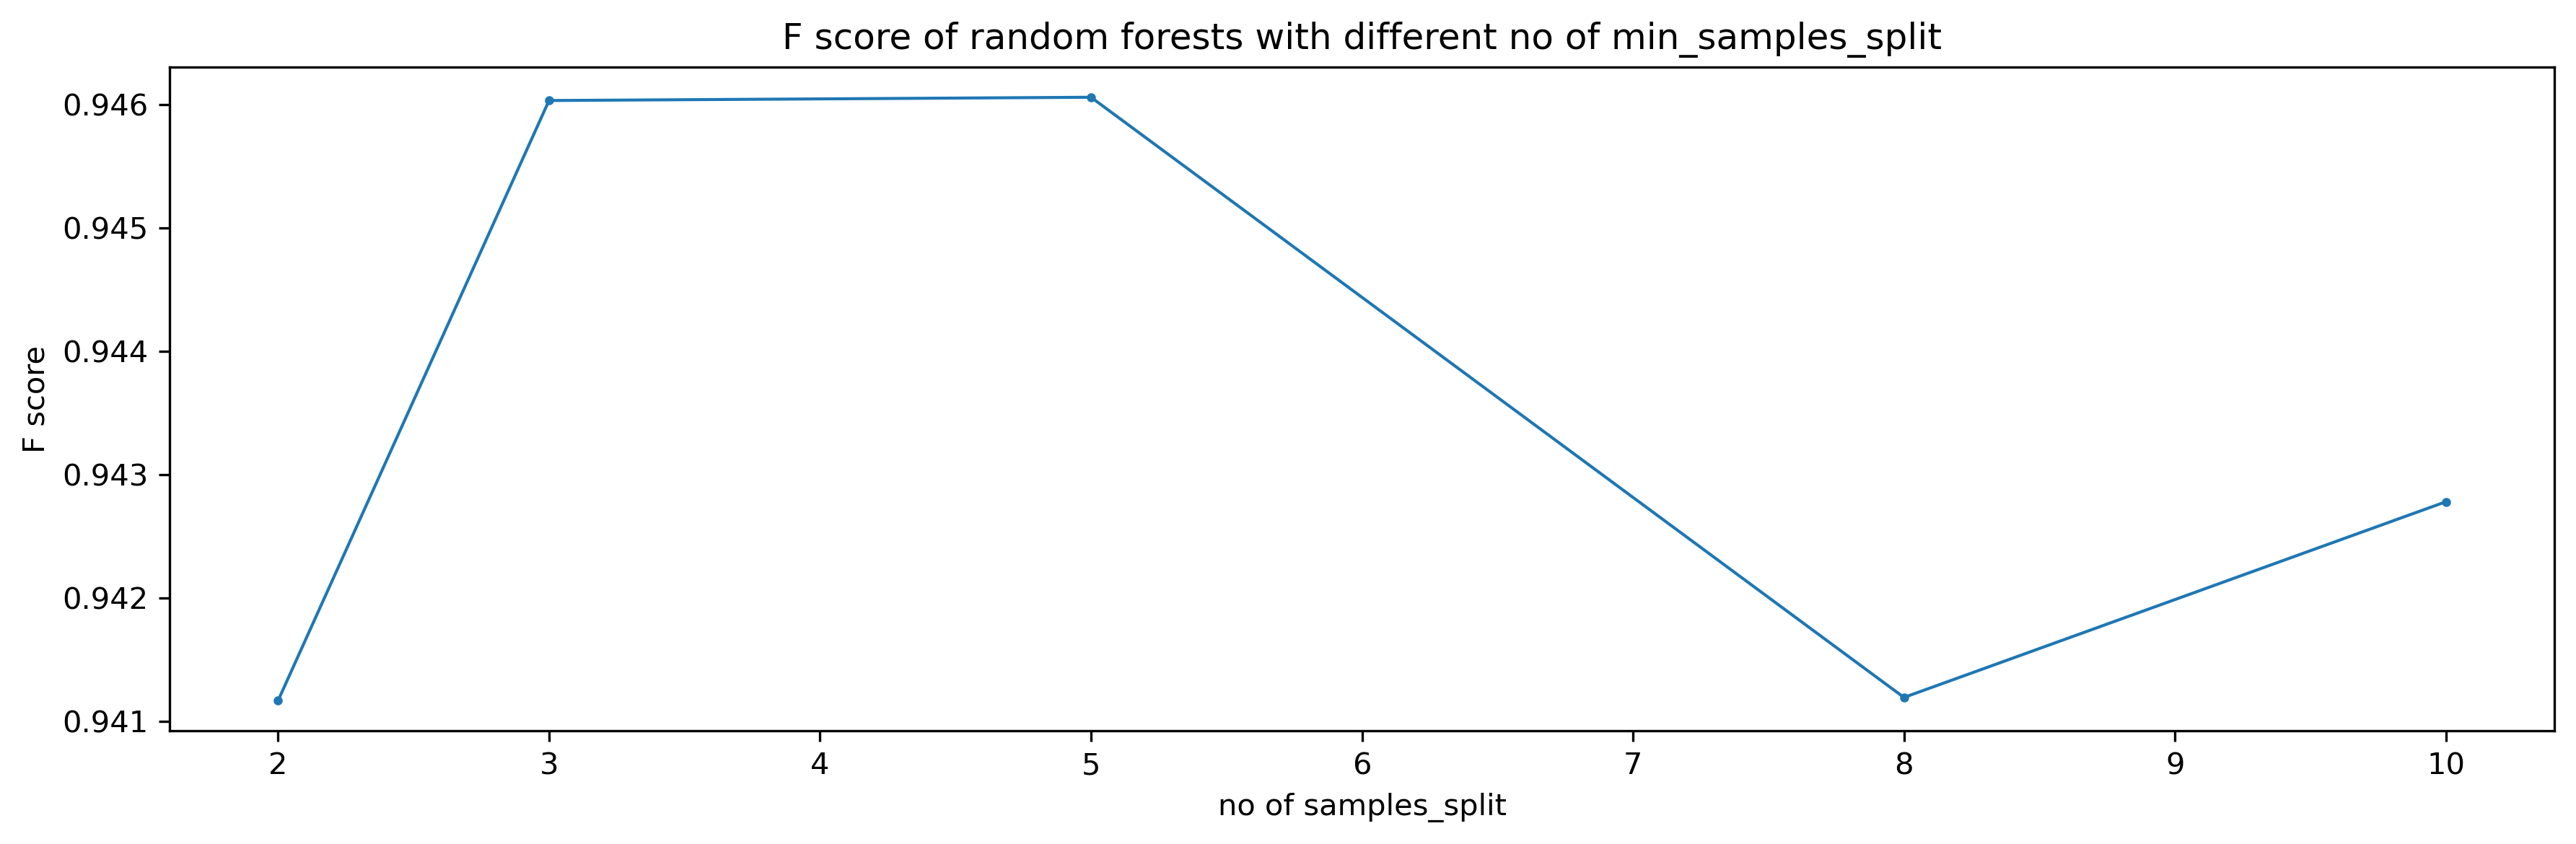

In [25]:
# Experiment for min samples split
fmeasures = []
for sample_split in [2,3,5,8,10]:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    fmeasure_fold = []   
    for train_index, test_index in kfold.split(X,y):  
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        smot = SMOTE()
        X_res, y_res = smot.fit_resample(X_train, y_train)
        y_pred, fmeasure, rf = train_random_forest(X_res, y_res,X_test, y_test, seed, n_estimators=800,
                                                   min_samples_split=sample_split, criterion='entropy')
        fmeasure_fold.append(fmeasure)
    fmeasures.append(np.mean(fmeasure_fold))
print('Highest F score of random forest when tuning the min samples split', np.max(fmeasures))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot([2,3,5,8,10], fmeasures,marker='o', markersize=2, lw=1)
axes.set_xlabel('no of samples_split')
axes.set_ylabel('F score')
axes.set_title('F score of random forests with different no of min_samples_split')
fig.tight_layout()
plt.show()  

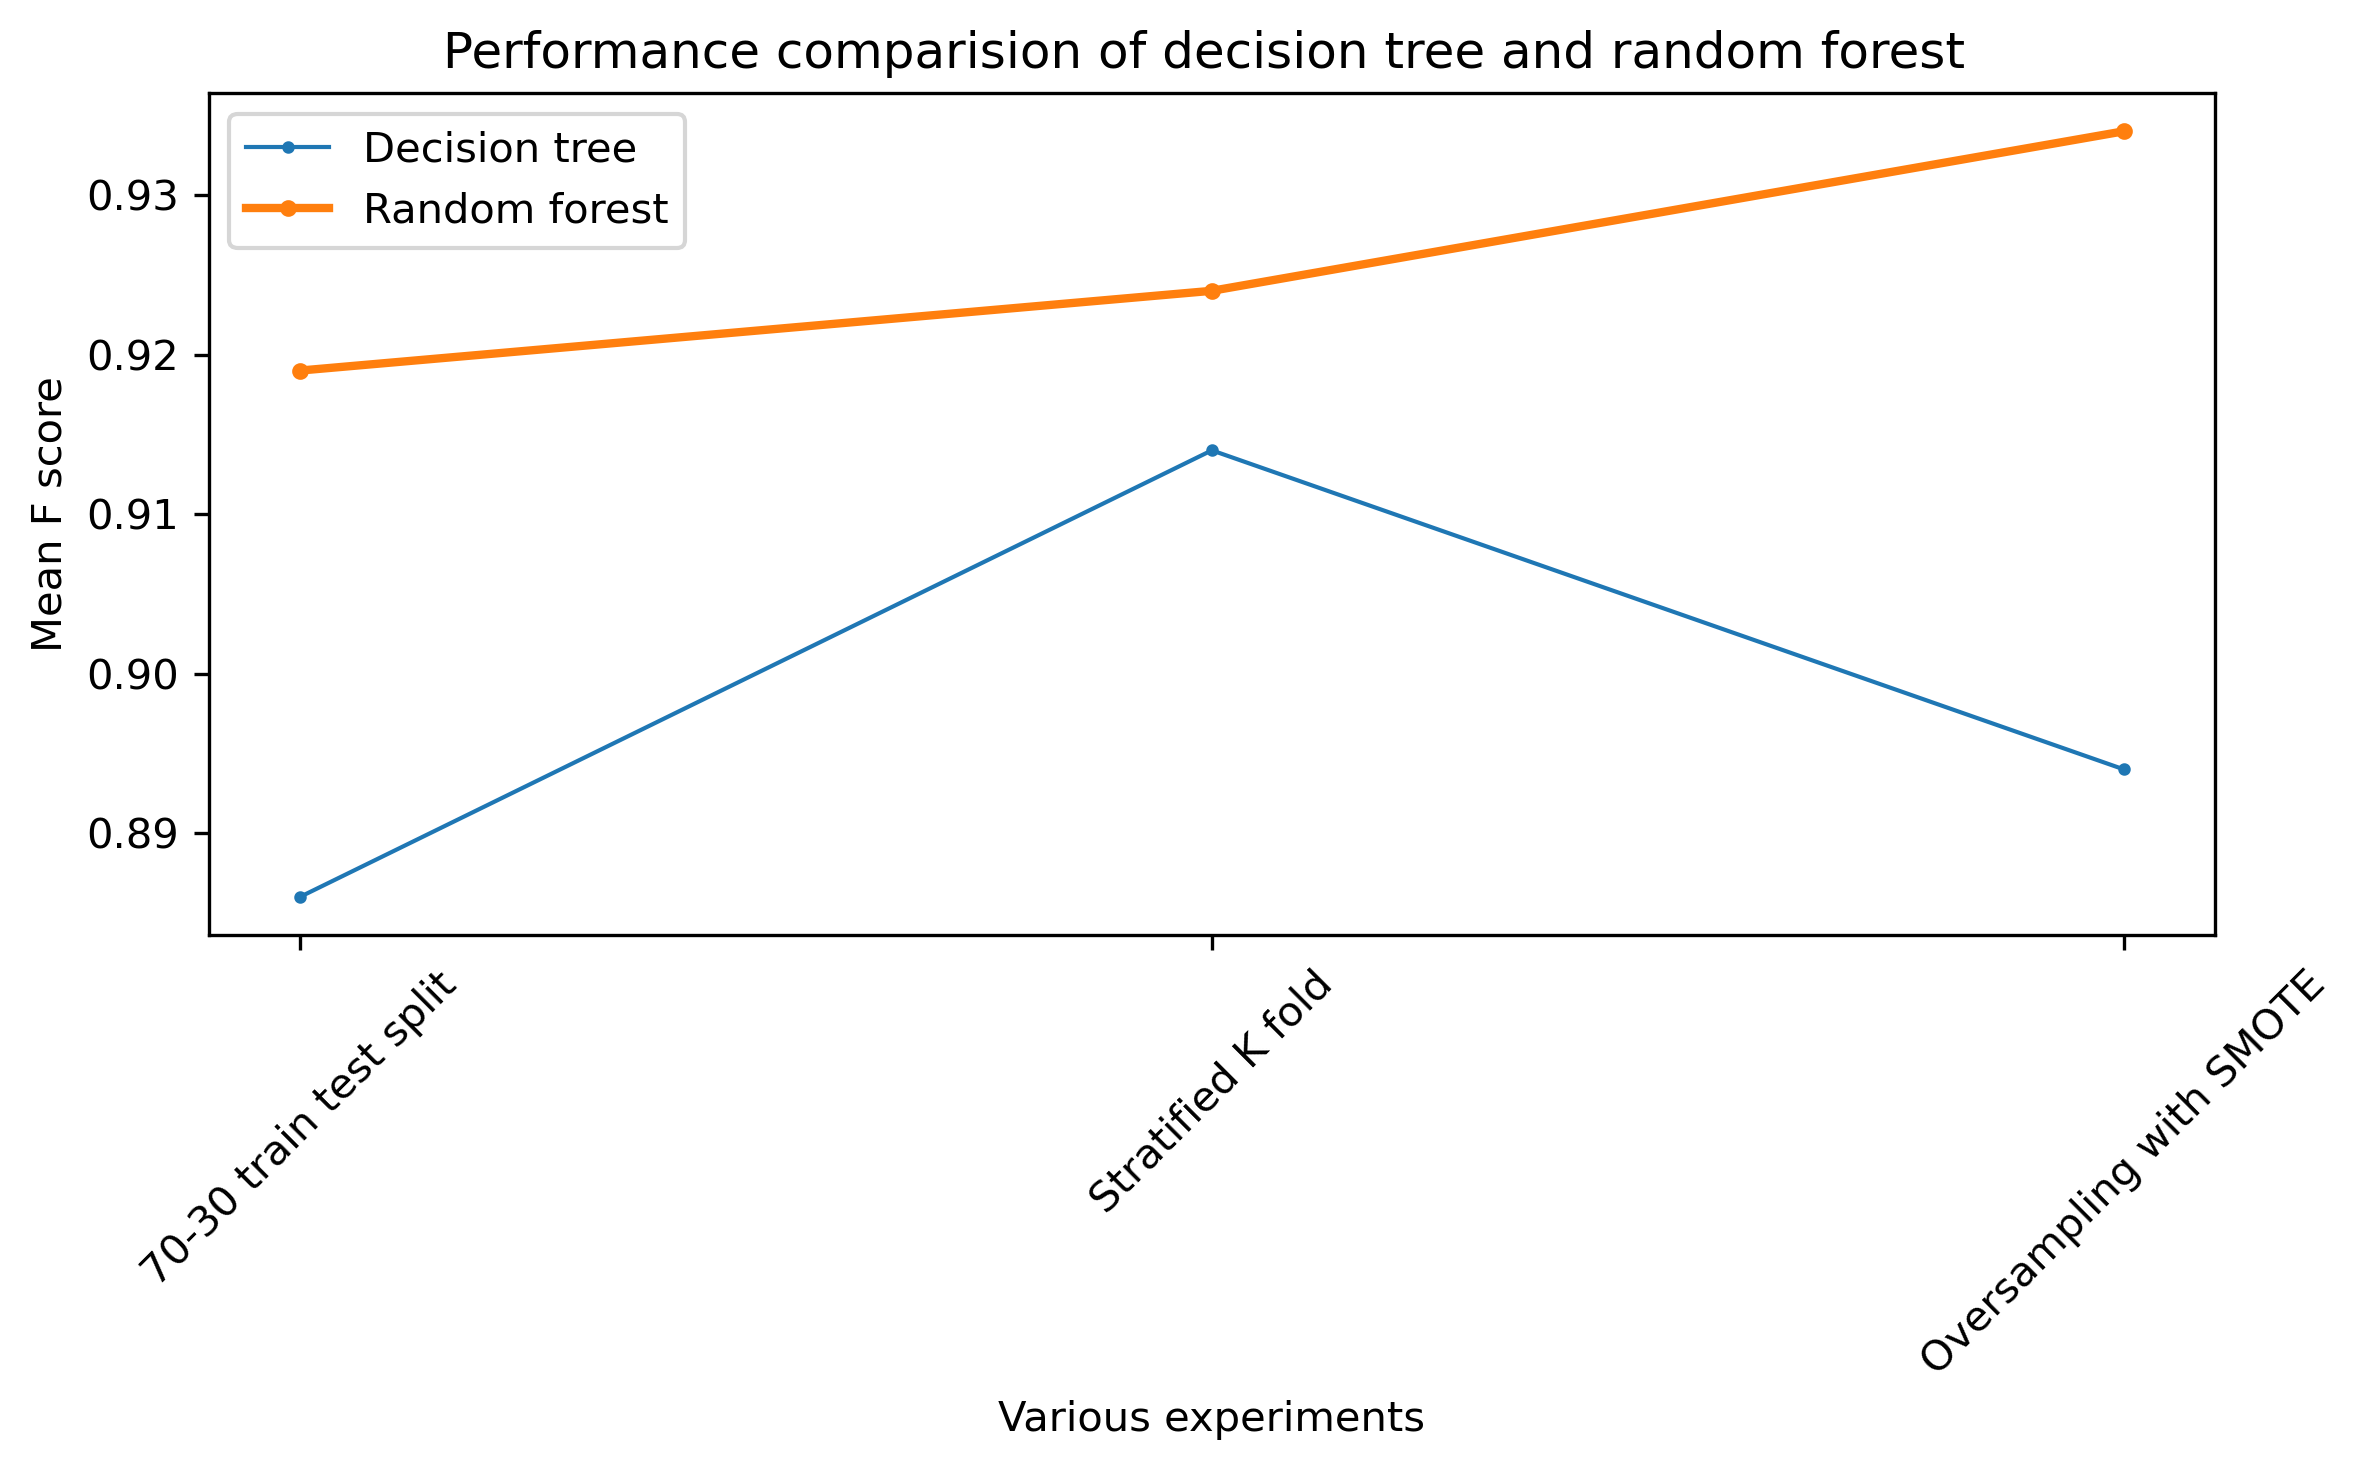

In [6]:
#performance comparision between decision tree and random forest
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5), dpi =300)
axes.plot(['70-30 train test split', 'Stratified K fold', 'Oversampling with SMOTE'], [0.886,0.914, 0.894],label='Decision tree',marker='o', markersize=2, lw=1)
axes.plot(['70-30 train test split', 'Stratified K fold', 'Oversampling with SMOTE'], [0.919,0.924,0.934],label='Random forest', marker='o', markersize=3, lw=2)
axes.set_xlabel('Various experiments')
axes.set_ylabel('Mean F score')
axes.set_xticklabels(labels = ['70-30 train test split', 'Stratified K fold', 'Oversampling with SMOTE'], rotation=45)
axes.set_title('Performance comparision of decision tree and random forest ')
axes.legend()
fig.tight_layout()
plt.show()